In [1]:
using LinearAlgebra
#using Plots
using SparseArrays
using Pkg
using Arpack
using PyPlot
using Random
using Statistics

In [2]:
using LinearAlgebra
#using Plots
using SparseArrays
using Pkg
using Arpack
using PyPlot
using Random
using Statistics

function RandomWalk(x::Int64)
    r = rand(1)[1]
    if r > 0.5
        x = x + 1
    else
        x = x - 1
    end
    return x
end
    
    
function GetT(step)
    x = 0
    t = 0
    while x != step
        x = RandomWalk(x)
        t = t + 1
    end
    return t
end
    


function state(x, step, N)
    T = []
    for i in 1:N
        t = GetT(step)
        push!(T, t::Int64)
    end
    return T
end


function Circle(x0, y0, r, label, color)
    θ = LinRange(0, 2*pi, 1000)
    x = r*cos.(θ) .+ x0
    y = r*sin.(θ) .+ y0
    PyPlot.plot(x, y, label = label, color)
end
    

Circle (generic function with 1 method)

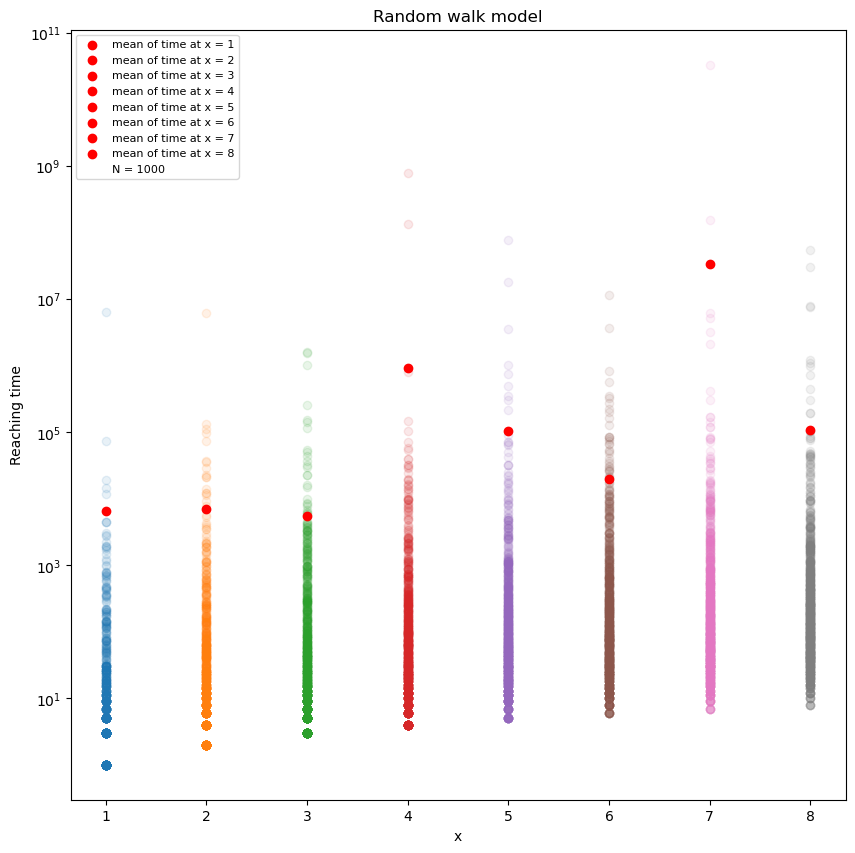

In [63]:
X = []
Y = []
N = 1000
k = 8
for i in 1:k
    x = [i for j in 1:N]
    y = state(0, i, N)
    push!(X, x)
    push!(Y, y)
end


PyPlot.figure(figsize=(10,10))
for i in 1:k
    PyPlot.scatter(X[i], Y[i], alpha = 0.1)
     PyPlot.scatter(X[i][1], mean(Y[i]), color = "r", label = "mean of time at x = $(i)")
end

label = "mean of time"
PyPlot.plot(X[1],Y[1], alpha = 0, label = "N = 1000")
PyPlot.yscale("log")
PyPlot.xlabel("x")
PyPlot.ylabel("Reaching time")
PyPlot.title("Random walk model")
PyPlot.legend(fontsize = 8)
PyPlot.show()

In [4]:
function RandomWalk2d(x, y)
    r = rand(1)[1]
    θ = 2*pi*r
    x = x + cos(θ)
    y = y + sin(θ)
    return x, y
end

RandomWalk2d (generic function with 1 method)

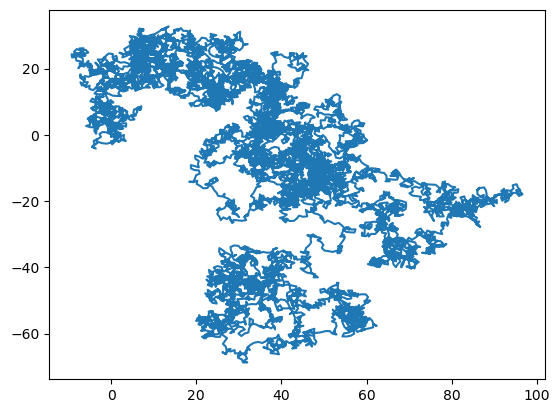

In [5]:

X = []
Y = []
x, y = 0, 0
for i in 1:10000
    x, y = RandomWalk2d(x, y)
    push!(X, x)
    push!(Y, y)
end

PyPlot.plot(X, Y)


PyPlot.show()

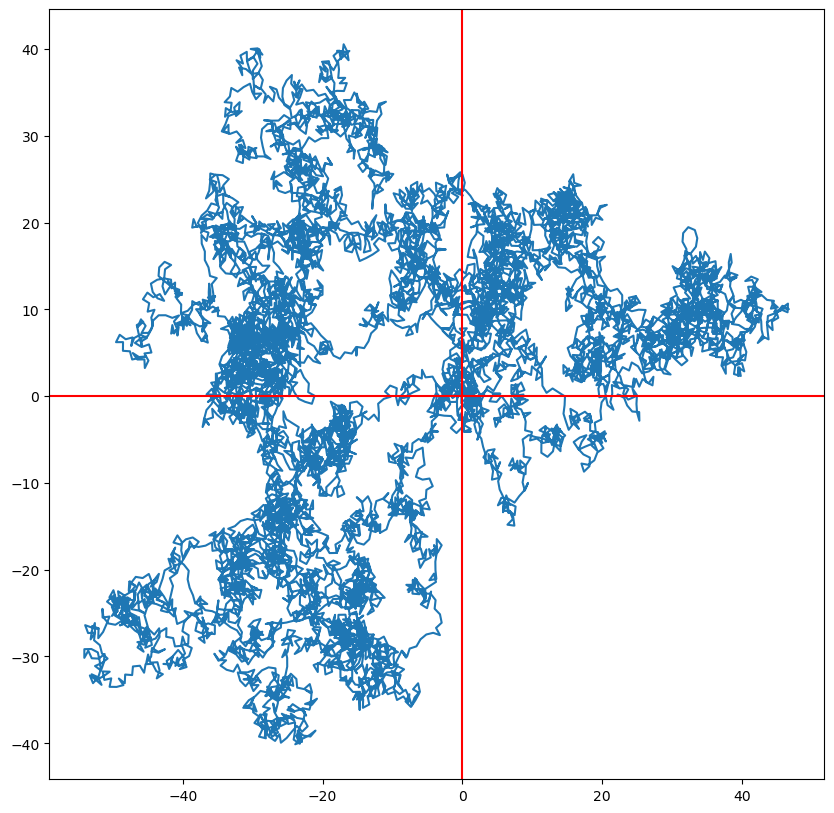

In [44]:

X = []
Y = []
x, y = 0, 0
for i in 1:10000
    x, y = RandomWalk2d(x, y)
    push!(X, x)
    push!(Y, y)
end
rx = mean(X)
ry = mean(Y)
r = sqrt(rx^2 + ry^2)




PyPlot.figure(figsize=(10,10))
PyPlot.plot(X, Y)
PyPlot.axvline(x = 0, color ="r")
PyPlot.axhline(y = 0, color = "r")


PyPlot.show()

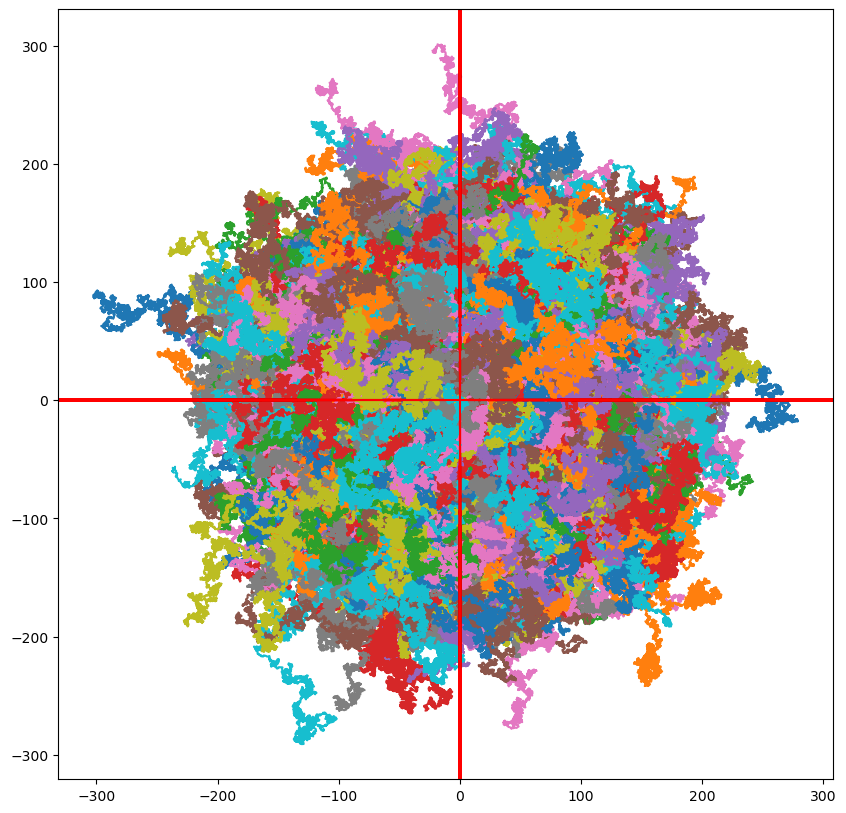

In [54]:
Color = ["#ff598f"]
PyPlot.figure(figsize=(10,10))
R = []
for j in 1:1000
    X = []
    Y = []
    x, y = 0, 0
    for i in 1:10000
        x, y = RandomWalk2d(x, y)
        push!(X, x)
        push!(Y, y)
    end
    r = sqrt(X[length(X)]^2 +Y[length(Y)]^2)#sqrt(rx^2 + ry^2)
    push!(R, r)

    PyPlot.plot(X, Y)
    #Circle(0,0,r, "r$(j) = $(r)",Color[1])
    PyPlot.axvline(x = 0, color = "r")
    PyPlot.axhline(y = 0, color = "r")
end




R1 = []
for j in 1:5000
    X = []
    Y = []
    x, y = 0, 0
    for i in 1:10000
        x, y = RandomWalk2d(x, y)
        push!(X, x)
        push!(Y, y)
    end
    r = sqrt(X[length(X)]^2 +Y[length(Y)]^2)#sqrt(rx^2 + ry^2)
    push!(R1, r)

    PyPlot.plot(X, Y)
    #Circle(0,0,r, "r$(j) = $(r)",Color[1])
    PyPlot.axvline(x = 0, color = "r")
    PyPlot.axhline(y = 0, color = "r")
end

R2 = []
for j in 1:500
    X = []
    Y = []
    x, y = 0, 0
    for i in 1:10000
        x, y = RandomWalk2d(x, y)
        push!(X, x)
        push!(Y, y)
    end
    r = sqrt(X[length(X)]^2 +Y[length(Y)]^2)#sqrt(rx^2 + ry^2)
    push!(R2, r)

    PyPlot.plot(X, Y)
    #Circle(0,0,r, "r$(j) = $(r)",Color[1])
    PyPlot.axvline(x = 0, color = "r")
    PyPlot.axhline(y = 0, color = "r")
end


In [6]:
function Normalize(R)
    RN = (R .- minimum(R))./(maximum(R).-minimum(R))
    return RN
end
    


Normalize (generic function with 1 method)

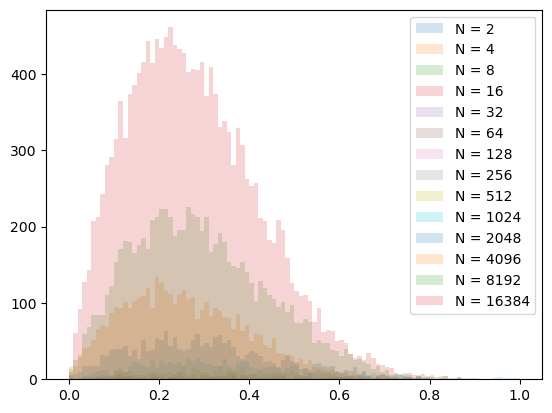

PyObject <matplotlib.legend.Legend object at 0x000000007E86B280>

In [10]:
function state2(N)
    R = []
    for j in 1:N
        X = []
        Y = []
        x, y = 0, 0
        for i in 1:1000
            x, y = RandomWalk2d(x, y)
            push!(X, x)
            push!(Y, y)
        end
        r = sqrt(X[length(X)]^2 +Y[length(Y)]^2)
        push!(R, r)

    end
    return R
end

for i in [2^n for n in 1:14]
    R = state2(i)
    PyPlot.hist(Normalize(R),100, alpha = 0.2, label = "N = $(i)")
end
PyPlot.legend()
    

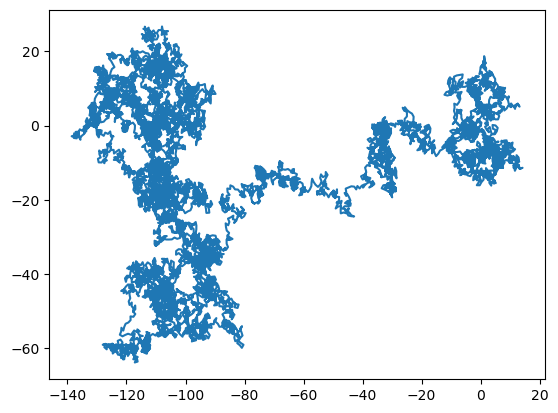

In [8]:

X = []
Y = []
x, y = 0, 0
for i in 1:10000
    x, y = RandomWalk2d(x, y)
    push!(X, x)
    push!(Y, y)
end

PyPlot.plot(X, Y)


PyPlot.show()

In [ ]:
Color = ["#ff598f"]
PyPlot.figure(figsize=(10,10))
R = []
for j in 1:1000
    X = []
    Y = []
    x, y = 0, 0
    for i in 1:10000
        x, y = RandomWalk2d(x, y)
        push!(X, x)
        push!(Y, y)
    end
    r = sqrt(X[length(X)]^2 +Y[length(Y)]^2)#sqrt(rx^2 + ry^2)
    push!(R, r)

    PyPlot.plot(X, Y)
    Circle(0,0,r, "r$(j) = $(r)",Color[1])
    PyPlot.axvline(x = 0, color = "r")
    PyPlot.axhline(y = 0, color = "r")
end


PyPlot.show()